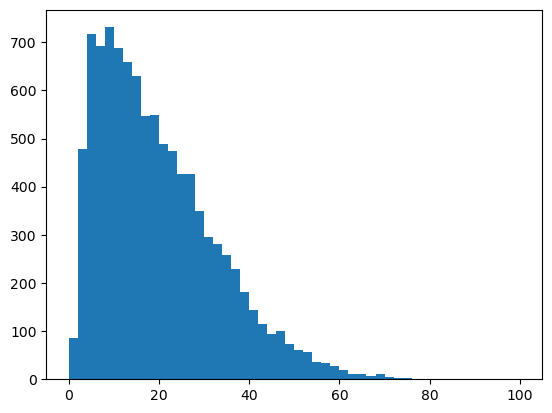

In [11]:
import numpy as np
from scipy.stats import skewnorm #skewnorm → A distribution from scipy.stats that lets you generate skewed (asymmetric) random data.
import matplotlib.pyplot as plt
numValues = 10000
maxValue = 100
skewness = 20   #Negative values are left skewed, positive values are right skewed.
'''
numValues = number of data points to generate (10,000 in this case).
maxValue = a target maximum value after scaling.
skewness = the skew parameter a in skewnorm.
Positive → long tail to the right (right-skewed).
Negative → long tail to the left (left-skewed).
'''

random = skewnorm.rvs(a = skewness, loc=maxValue, size = numValues) #Skewnorm function
'''
Generates numValues random values from a skewed normal distribution:
    a → skewness parameter.
    loc → shifts the center of the distribution.
    size → number of values to generate.
At this stage, the numbers are roughly centered around loc (=100) and skewed according to a.
'''
random = random - min(random)   #Shift the set so the mininum value is equal to zero.
'''
Takes the smallest value in the dataset and shifts the whole set so that the minimum becomes 0.
This ensures all values are ≥ 0.
'''
random = random / max(random)   #Standardize all the values between 0 and 1.
'''
Divides all values by the current maximum.
Now all values are between 0 and 1.
'''
random = random * maxValue      #Multiply the standardized values by the maximum value.
'''
Multiplies the normalized values by maxValue (100 here).
Now all values are in the range 0 to 100, with the same skewness shape.
'''
x = random

#Plot histogram to check skewness
# plt.hist(x); #A histogram with a small number of bins is usually described as a coarse histogram or low-resolution histogram.
plt.hist(x, bins=50);

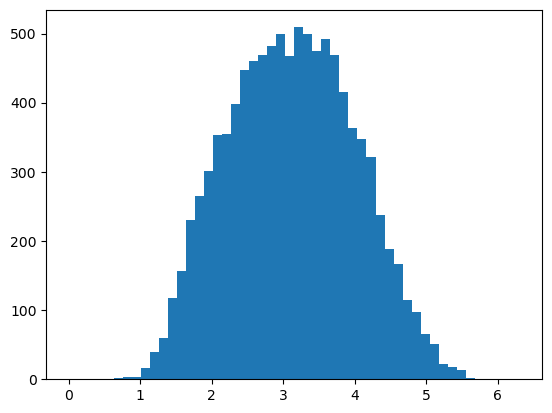

In [12]:
plt.hist(x**0.4, bins=50); #This actually looks somewhat more Gaussian but not perfectly.

/var/folders/5f/dq45wr613kb8f2bwp4zr0gpc0000gn/T/ipykernel_34466/3378603717.py:1: RuntimeWarning: divide by zero encountered in log
  plt.hist(np.log(x), bins=50);


ValueError: supplied range of [-inf, 4.605170185988092] is not finite

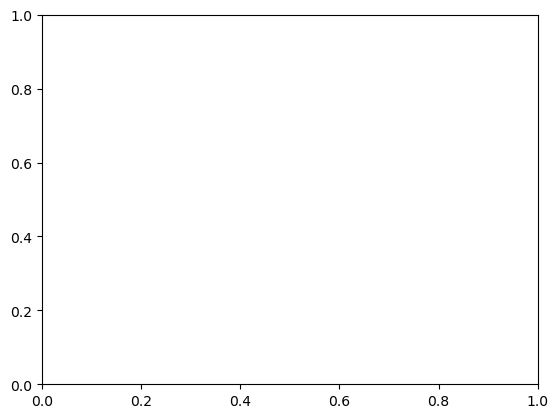

In [ ]:
plt.hist(np.log(x), bins=50);
'''
we'll get a warning that is telling:
"Some values in x are zero (or negative), and taking np.log() of those values causes problems."

Why this happens
Logarithm rules:
log(0) → undefined → mathematically tends toward −∞.
log(negative) → not defined for real numbers (would be complex).

When NumPy encounters np.log(0), it:
Produces -inf for that element.
Raises the RuntimeWarning: divide by zero encountered in log.
'''

How to fix it?  

If you know all values are non-negative, you can add a small constant to avoid zeros:


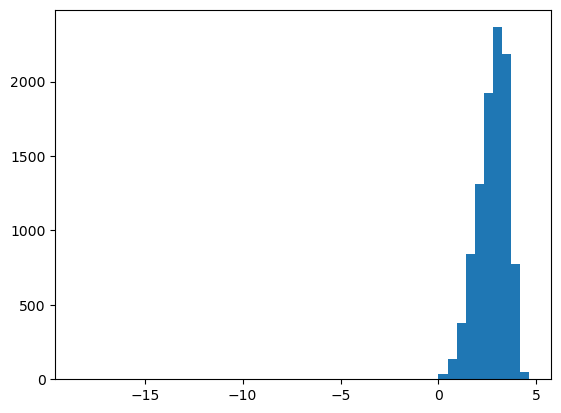

In [14]:
plt.hist(np.log(x + 1e-8), bins=50);

Here 1e-8 is a tiny number so it doesn’t change the distribution much but avoids the log(0) problem.

Now let's make it look more Gaussian:

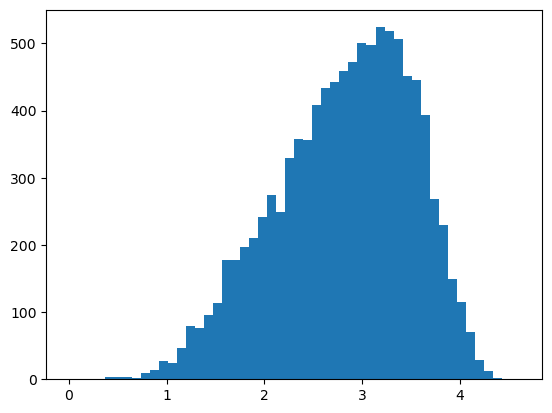

In [ ]:
plt.hist(np.log(x + 1), bins=50);

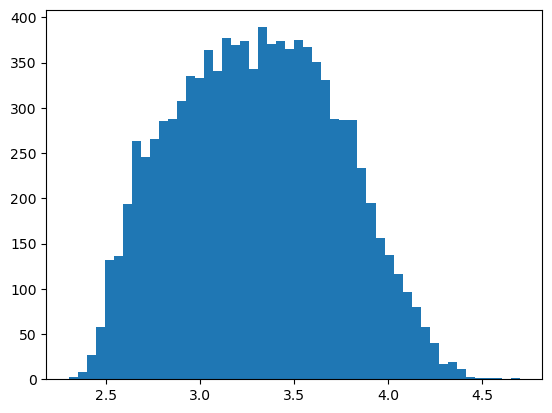

In [16]:
plt.hist(np.log(x + 10), bins=50);

If you read the machine learning literature, you’ll find various methods to automatically measure how close these distributions are to Gaussian. However, in practice, I’ve found it doesn’t make a big difference — if you just try a few transformations and pick one that looks right to you, it will work well for all practical purposes.

So, by experimenting in Jupyter Notebook, you can choose a transformation that makes your data more Gaussian. And as a reminder: whatever transformation you apply to the training set, make sure to apply the same transformation to your cross-validation and test set data as well.

In [ ]:
xNew = x**0.4